# Iris Model
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load data into the python environment
***

In [2]:
data = pd.read_excel('./iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.Classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

From the above result it can be concluded that the above problem statement belongs to **"Multi-Class Classification Problem"**

### 2. Pre-processing
***

In [4]:
# shape
data.shape

(150, 5)

In [5]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


There are 4 columns in iris dataset out of which the predictor column 'Classification' belongs to object type. Rest columns belongs to float

In [6]:
# check for null values
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

There are null values present in dataset

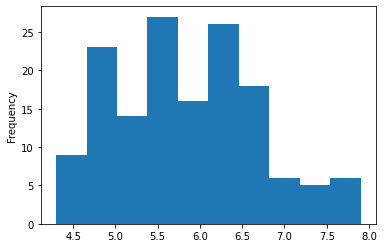

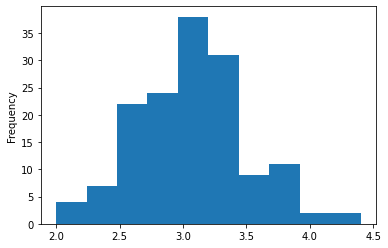

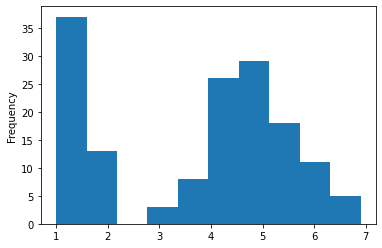

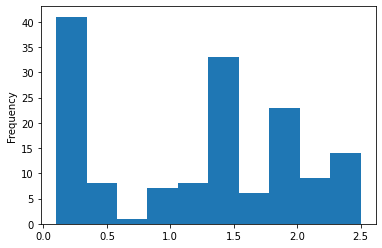

In [7]:
for column in data.columns[:-1]:
    data[column].plot.hist()
    plt.show()

From the histogram it is clear that columns in dataset are almost normally distributed, so null values can be replaced with mean

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SW,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PL,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [9]:
# Filling missing values
for column in data.columns[:-1]:
    data[column].fillna(round(data[column].mean(), 1), inplace= True)

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

All the null values have been removed

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SL,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SW,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PL,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


Filling with mean didnot introduce observable change in dataset

In [12]:
# Label Encode 'Classification' Column
from sklearn.preprocessing import LabelEncoder
data['Classification'] = LabelEncoder().fit_transform(data['Classification'])

In [13]:
data.Classification.value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

### 3. Model Building
***

In [14]:
# Function to check model performances
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
def check_model_metrices(y_test, y_pred):
    print('Model Accuracy = ', accuracy_score(y_test, y_pred))
    print('Model Precision = ', precision_score(y_test, y_pred, average='micro'))
    print('Model Recall = ', recall_score(y_test, y_pred, average='micro'))
    print('Model F1 Score = ', f1_score(y_test, y_pred, average='micro'))
    print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))

In [15]:
# feature selection
X = data[data.columns[:-1]] # features
y = data['Classification'] # target
print(f'Feature shape: {X.shape}')

Feature shape: (150, 4)


In [16]:
# Spliting to training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (105, 4)
X_test shape: (45, 4)


#### Model : Random Forest
***

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [18]:
check_model_metrices(y_test, rf_pred)

Model Accuracy =  1.0
Model Precision =  1.0
Model Recall =  1.0
Model F1 Score =  1.0
Confusion Matrix = 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [19]:
import pickle
pickle_file = open('./iris-model.pkl', 'wb')
pickle.dump(rf, pickle_file)
pickle_file.close()